In [1]:
import pandas as pd
import pyarrow as pa

In [2]:
df = pd.read_parquet('processed.parquet', engine='pyarrow')
df.drop("id", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   age                       int64  
 1   tenure                    float64
 2   avg_call_duration         float64
 3   data_usage                float64
 4   roaming_usage             float64
 5   monthly_charge            float64
 6   overdue_payments          int64  
 7   avg_top_up_count          int64  
 8   call_drops                float64
 9   customer_support_calls    int64  
 10  satisfaction_score        float64
 11  churn                     bool   
 12  auto_payment_true         int64  
 13  auto_payment_false        int64  
 14  auto_payment_unknown      int64  
 15  CüzdanX                   int64  
 16  HızlıPazar                int64  
 17  Konuşalım                 int64  
 18  RitimGo                   int64  
 19  İzleGo                    int64  
 20  service_type_Broadband 

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # Make sure you have imblearn installed

# Assuming 'df' is your preprocessed DataFrame and the target column is named 'target'
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class on the training data
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier without scale_pos_weight
model = XGBClassifier(eval_metric='logloss', random_state=42, warning='ignore')

# Train the model on the resampled data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"F1 Score:   {f1:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"AUC:        {auc:.4f}")


c:\Users\utkub\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\utkub\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\utkub\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\utkub\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

F1 Score:   0.0130
Recall:     0.0074
Precision:  0.0517
AUC:        0.7334


<Figure size 1000x800 with 0 Axes>

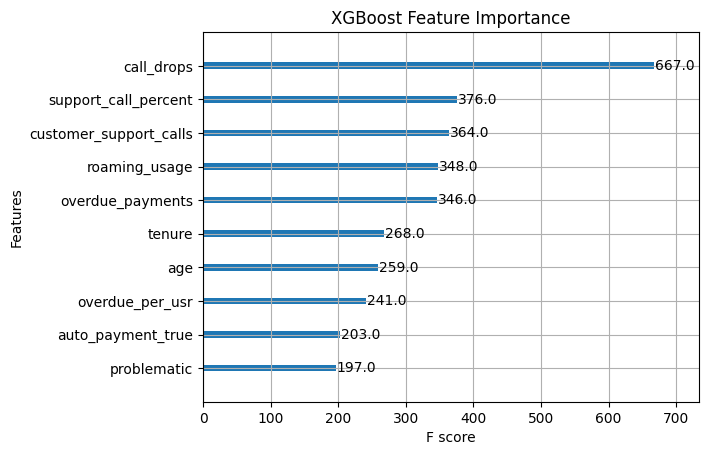

overdue_but_auto_payment    0.094660
total_apps_used             0.092356
call_drops                  0.063775
CüzdanX                     0.063504
HızlıPazar                  0.063493
auto_payment_true           0.059631
age_group_18-25             0.048973
age_group_35-45             0.046517
age_group_45+               0.046313
İzleGo                      0.045556
age_group_25-35             0.041497
auto_payment_unknown        0.037135
auto_payment_false          0.030216
service_type_Prepaid        0.029068
age                         0.027639
tenure_group_48+            0.024008
overdue_payments            0.019899
RitimGo                     0.018790
tenure_group_6-12           0.014356
support_call_percent        0.014002
overdue_per_usr             0.013213
tenure_group_12-24          0.012738
tenure_group_24-48          0.012558
roaming_usage               0.009262
tenure_group_0-6            0.007934
service_type_Postpaid       0.007765
customer_support_calls      0.007243
K

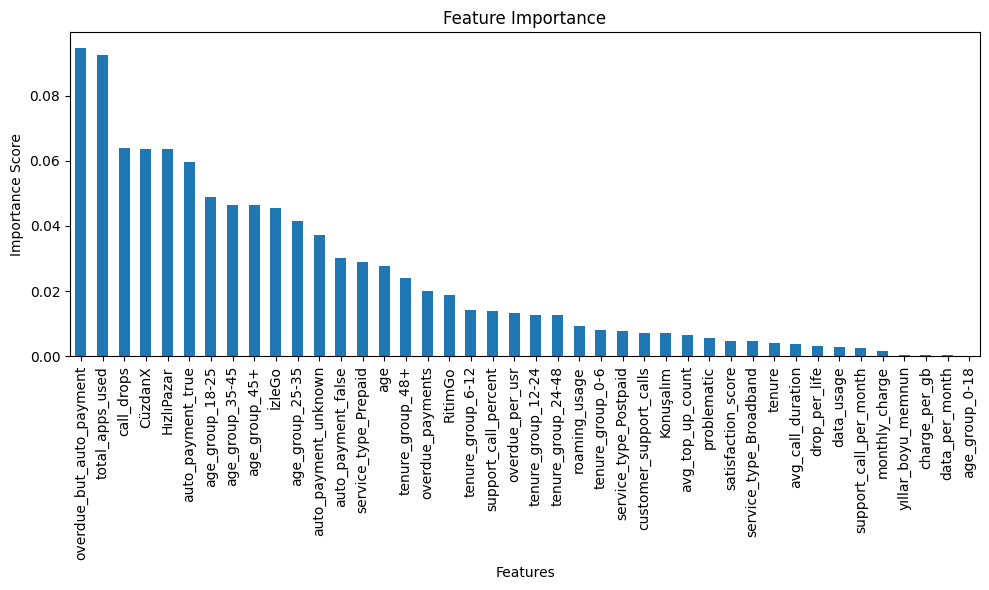

In [4]:
# Option 1: Using XGBoost's built-in plot_importance function
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10)  # You can adjust max_num_features as needed
plt.title("XGBoost Feature Importance")
plt.show()

# Option 2: Creating a bar plot using pandas for more customization
import pandas as pd

# Create a pandas Series with feature importances, using the feature names from your DataFrame
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Print the feature importances
print(feature_importances)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
